In [108]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
df = pd.read_csv("/home/ryo_matsui/notebook/mydata/ToxicComment/jigsaw-toxic-comment-train.csv")

In [113]:
vectorizer = CountVectorizer(min_df=3, max_df=0.9, stop_words="english", binary=True)
X = vectorizer.fit_transform(df.head(10000).comment_text)
y = df.head(10000).toxic.values

In [114]:
X.nnz / X.shape[0] / X.shape[1]

0.0022754104966253652

In [115]:
train_data = X.A
test_data = X.A
y = y[:,np.newaxis]

# d = 100

In [131]:
cmf = tfCMF(alpha=0.7, d_hidden=100, lamda=1)
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=5, lr=0.001, optimizer="SGD")

100%|██████████| 600/600 [21:38<00:00,  2.16s/it]


In [120]:
cmf = tfCMF(alpha=0.7, d_hidden=100, lamda=1)
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=5, lr=0.001, optimizer="Adam")

 86%|████████▋ | 518/600 [18:43<02:57,  2.17s/it]


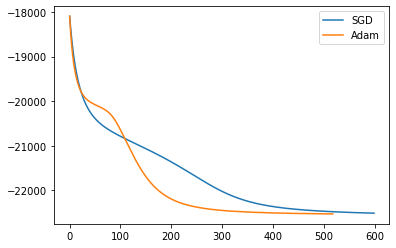

In [132]:
plt.plot(np.arange(0,600),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,519),train_loss_Adam, label="Adam")
plt.legend()
plt.show()

# d = 20

In [133]:
cmf = tfCMF(alpha=0.7, d_hidden=20, lamda=1)
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=1000, lr=0.001, optimizer="SGD")

100%|██████████| 600/600 [19:53<00:00,  1.99s/it]


In [134]:
cmf = tfCMF(alpha=0.7, d_hidden=20, lamda=1)
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=1000, lr=0.001, optimizer="Adam")

100%|██████████| 600/600 [19:57<00:00,  2.00s/it]


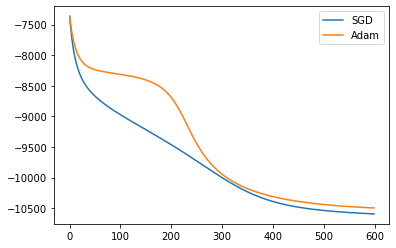

In [135]:
plt.plot(np.arange(0,600),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,600),train_loss_Adam, label="Adam")
plt.legend()
plt.show()

# d = 10

In [ ]:
cmf = tfCMF(alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=5, lr=0.001, optimizer="SGD")

In [ ]:
cmf = tfCMF(alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, y, optim_steps=600, early_stopping=5, lr=0.001, optimizer="Adam")

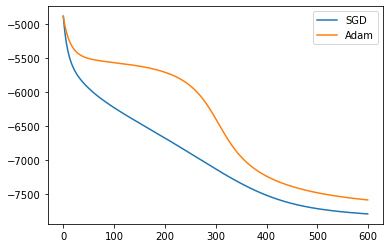

In [7]:
plt.plot(np.arange(0,600),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,600),train_loss_Adam, label="Adam")
plt.legend()
plt.show()